## Building a synthetic model

In [1]:
import sys
import pybert as pb
import pygimli as pg
import pygimli.meshtools as mt
import numpy as np

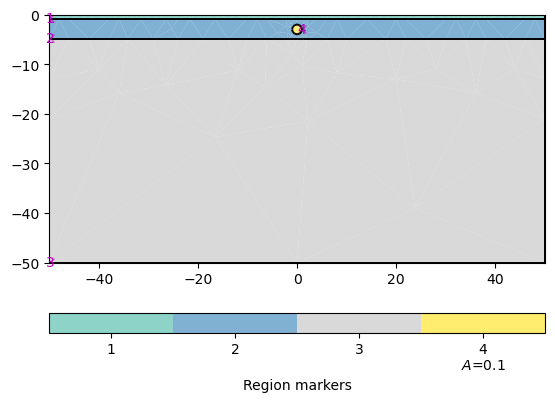

In [2]:
world = mt.createWorld(start=[-50, 0], end=[50, -50], layers=[-1, -5], worldMarker=1)
# Create some heterogeneous circle and merge with world
block = mt.createCircle(pos=[0, -3.], radius=1, marker=4, boundaryMarker=10, area=0.1)
geom = mt.mergePLC([world, block])
pg.show(geom);

In [3]:
# place electrodes in the mesh and refine them
xEl = np.linspace(-10, 10, 21)
[geom.createNode((x, 0, 0), -99) for x in xEl]
[geom.createNode((x, -0.1, 0)) for x in xEl]
mesh = mt.createMesh(geom)
scheme = pb.createData(elecs=xEl, schemeName='dd')

In [4]:
#                dumm, La   2.S   3.S   Body
rhovec = np.array([0,  100.0, 50.0, 10.0, 100])  # ohm m
tauvec = np.array([0,   1e-3, 1e-3,  1e-3,   1.0])  # s
mvec = np.array([0.001, 0.01, 0.001,  0.1,   0.5])  # - [0-1]
cvec = np.array([0.5,    0.5,  0.5,  0.5,   0.5])  # - [0-0.5]
frvec = [0.156, 0.312, 0.625, 1.25, 2.5, 5, 10, 20, 40, 80, 125, 250, 500, 1000]
fdip = pb.FDIPdata(f=frvec, data=scheme)
fdip.simulate(mesh, rhovec, tauvec, mvec, cvec)
fdip.generateDataPDF(ipmax=100)

06/06/23 - 09:50:46 - pyGIMLi - WARNING - Obsolete, do not use!. Use ert.simulate instead
06/06/23 - 09:50:46 - pyGIMLi - INFO - Complex resistivity values found.
06/06/23 - 09:50:46 - pyGIMLi - INFO - Calculate geometric factors.
06/06/23 - 09:50:46 - pyGIMLi - WARNING - Obsolete, do not use!. Use ert.simulate instead
06/06/23 - 09:50:46 - pyGIMLi - INFO - Complex resistivity values found.
06/06/23 - 09:50:46 - pyGIMLi - WARNING - Obsolete, do not use!. Use ert.simulate instead
06/06/23 - 09:50:46 - pyGIMLi - INFO - Complex resistivity values found.
06/06/23 - 09:50:46 - pyGIMLi - WARNING - Obsolete, do not use!. Use ert.simulate instead
06/06/23 - 09:50:46 - pyGIMLi - INFO - Complex resistivity values found.
06/06/23 - 09:50:46 - pyGIMLi - WARNING - Obsolete, do not use!. Use ert.simulate instead
06/06/23 - 09:50:46 - pyGIMLi - INFO - Complex resistivity values found.
06/06/23 - 09:50:46 - pyGIMLi - WARNING - Obsolete, do not use!. Use ert.simulate instead
06/06/23 - 09:50:46 - pyGIM

<Figure size 800x1000 with 0 Axes>

nr= [  7  25  42  58  73  87 100 112 123 133 142]


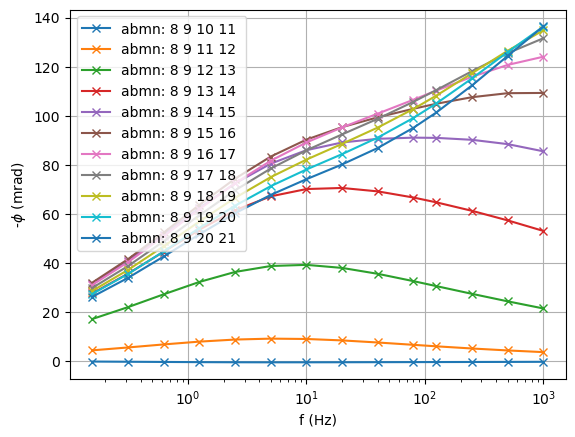

In [5]:
fdip.showDataSpectra(ab=[8, 9]);

In [6]:
fdip.simultaneousInversion()

06/06/23 - 09:50:53 - pyGIMLi - INFO - Found 2 regions.
06/06/23 - 09:50:53 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
06/06/23 - 09:50:53 - pyGIMLi - INFO - Found 2 regions.
06/06/23 - 09:50:53 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
06/06/23 - 09:50:53 - pyGIMLi - INFO - Found 2 regions.
06/06/23 - 09:50:53 - pyGIMLi - INFO - Region with smallest marker (1) set to background
06/06/23 - 09:50:53 - pyGIMLi - INFO - Creating forward mesh from region infos.
06/06/23 - 09:50:53 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
06/06/23 - 09:50:53 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 2191 Cells: 4144 Boundaries: 3226
06/06/23 - 09:50:54 - pyGIMLi - WARNING - Parameter count is 0
06/06/23 - 09:50:54 - pyGIMLi - WARNING - Parameter count is 0


531 model cells


06/06/23 - 09:50:54 - pyGIMLi - ERROR - <class 'pygimli.frameworks.inversion.Inversion'>.convertStartModel(c:\Guenther.T\src\gimli\gimli\pygimli\frameworks\inversion.py:224)
Starting model size invalid 7434 != 0.
06/06/23 - 09:50:54 - pyGIMLi - INFO - Created startmodel from forward operator: 7434 [52.74222256020068,...,52.74222256020068]
06/06/23 - 09:50:54 - pyGIMLi - INFO - Starting inversion.
06/06/23 - 09:50:54 - pyGIMLi - INFO - Creating forward mesh from region infos.


fop: <pygimli.frameworks.timelapse.MultiFrameModelling object at 0x000002A0ABE6EA40>
Data transformation: <pgcore._pygimli_.RTrans object at 0x000002A0B0F1F7C0>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x000002A0AC5C6360>
min/max (data): 17.23/102
min/max (error): 3.02%/110%
min/max (start model): 52.74/52.74
--------------------------------------------------------------------------------


RuntimeError: RegionManager knows no mesh.